In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("transport.csv")

print("Initial Data Info:\n")
print(df.info())


Initial Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB
None


In [2]:
print("\nMissing Values:\n")
print(df.isnull().sum())



Missing Values:

Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64


In [3]:
df = df.drop(columns=['Other'])

In [4]:
print("\nFirst 5 Rows:\n")
print(df.head())



First 5 Rows:

         Date  Local Route  Light Rail  Peak Service  Rapid Route  School
0  30-08-2024        16436       10705           225        19026    3925
1  15-09-2023        15499       10671           267        18421    4519
2  28-12-2021         1756        2352             0         3775       0
3  11-01-2023        10536        8347           223        14072       0
4  11-09-2021          820         612             0         1283       0


In [5]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  
df = df.sort_values('Date')
df.fillna(method='ffill', inplace=True) 

print("\nCleaned Data:\n")
print(df.describe())



Cleaned Data:

                      Date   Local Route    Light Rail  Peak Service  \
count                 1918   1918.000000   1918.000000   1918.000000   
mean   2022-02-13 12:00:00   9891.395203   7195.446298    179.581335   
min    2019-07-01 00:00:00      1.000000      0.000000      0.000000   
25%    2020-10-22 06:00:00   3044.500000   4463.500000      0.000000   
50%    2022-02-13 12:00:00  11417.000000   7507.000000    193.000000   
75%    2023-06-07 18:00:00  15517.500000  10008.250000    313.750000   
max    2024-09-29 00:00:00  21070.000000  15154.000000   1029.000000   
std                    NaN   6120.715714   3345.616428    156.532738   

        Rapid Route       School  
count   1918.000000  1918.000000  
mean   12597.213243  2352.694995  
min        0.000000     0.000000  
25%     6383.000000     0.000000  
50%    13106.500000   567.500000  
75%    17924.750000  4914.000000  
max    28678.000000  7255.000000  
std     6720.494557  2494.766306  


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df_sorted = df.sort_values(by='Date', ascending=False).reset_index(drop=True)
print(df_sorted.head())


        Date  Local Route  Light Rail  Peak Service  Rapid Route  School
0 2024-09-29            1           0             0            3       0
1 2024-09-28            1           0             0            4       0
2 2024-09-27            6           0             0           13       0
3 2024-09-26            9           0             0            0       2
4 2024-09-25           21           0             1           10       8


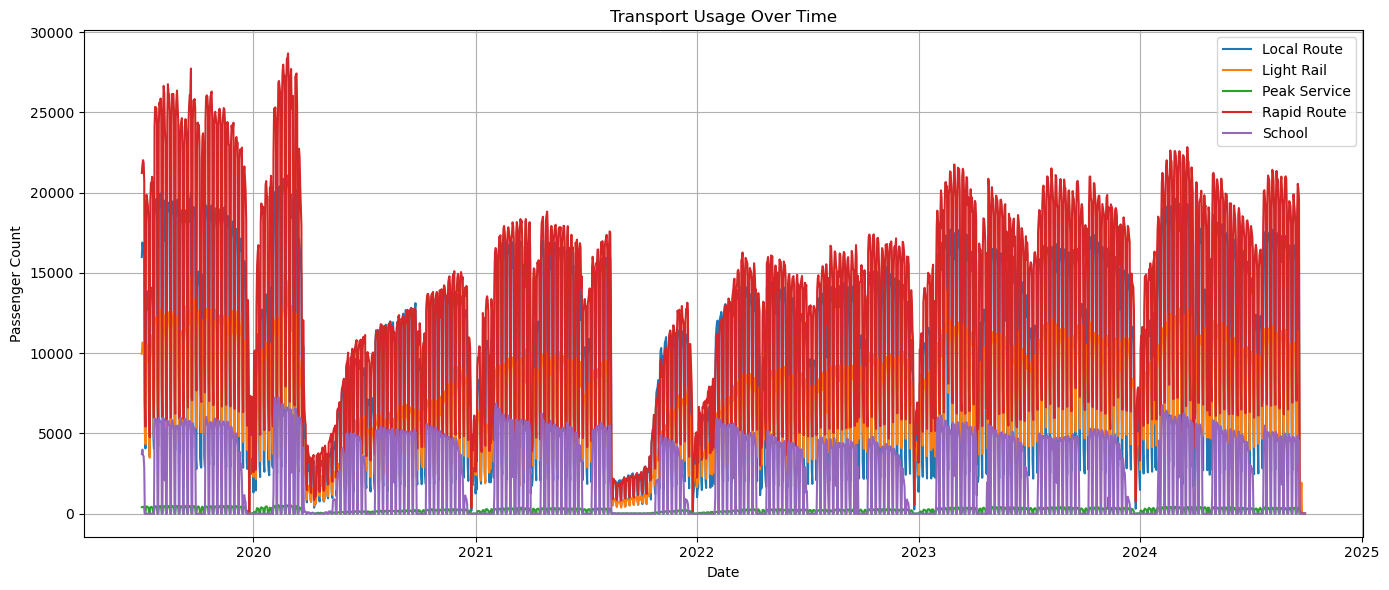

In [7]:
plt.figure(figsize=(14, 6))
columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']
for col in columns:
    plt.plot(df['Date'], df[col], label=col)

plt.title("Transport Usage Over Time")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


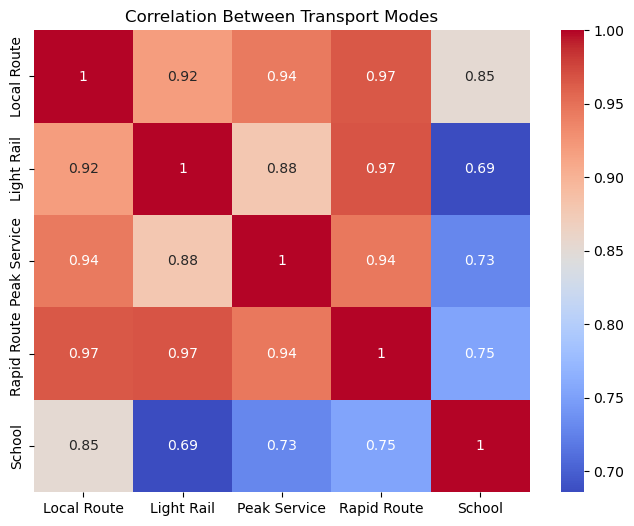

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Transport Modes")
plt.show()



Forecasting for: Local Route


12:36:01 - cmdstanpy - INFO - Chain [1] start processing
12:36:01 - cmdstanpy - INFO - Chain [1] done processing


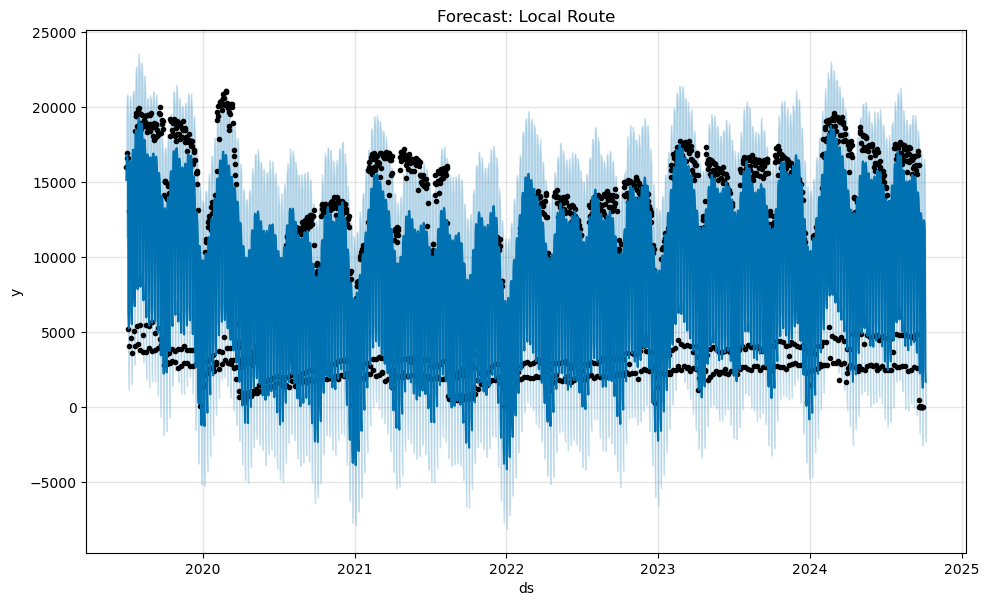

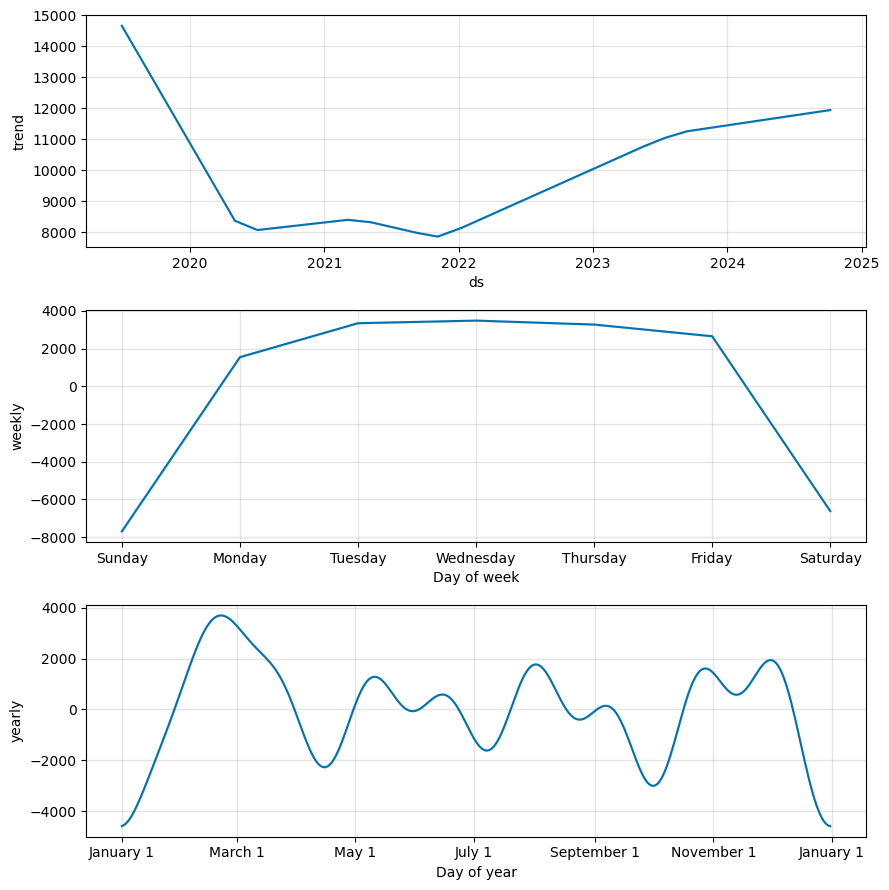

12:36:02 - cmdstanpy - INFO - Chain [1] start processing


Forecast saved to: forecast_local_route.csv

Forecasting for: Light Rail


12:36:03 - cmdstanpy - INFO - Chain [1] done processing


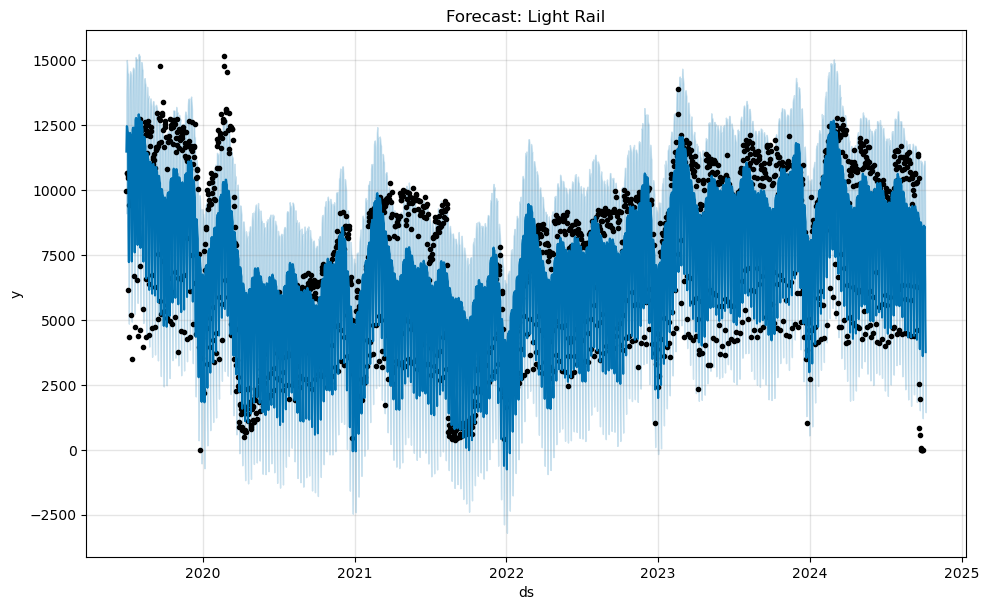

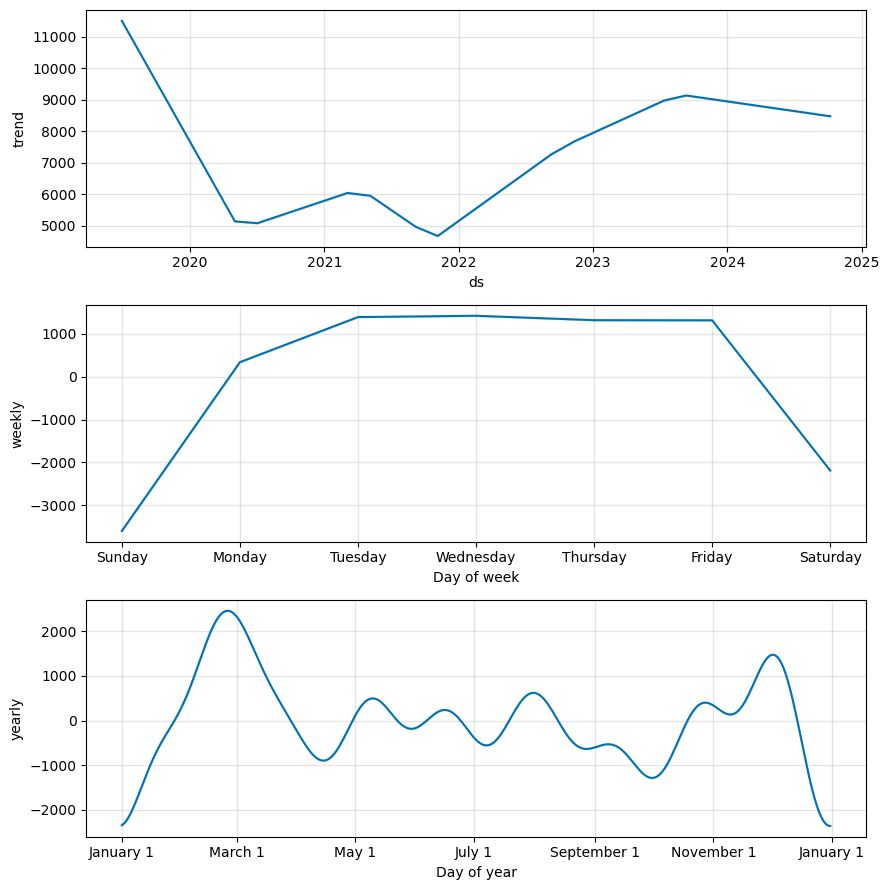

12:36:04 - cmdstanpy - INFO - Chain [1] start processing


Forecast saved to: forecast_light_rail.csv

Forecasting for: Peak Service


12:36:04 - cmdstanpy - INFO - Chain [1] done processing


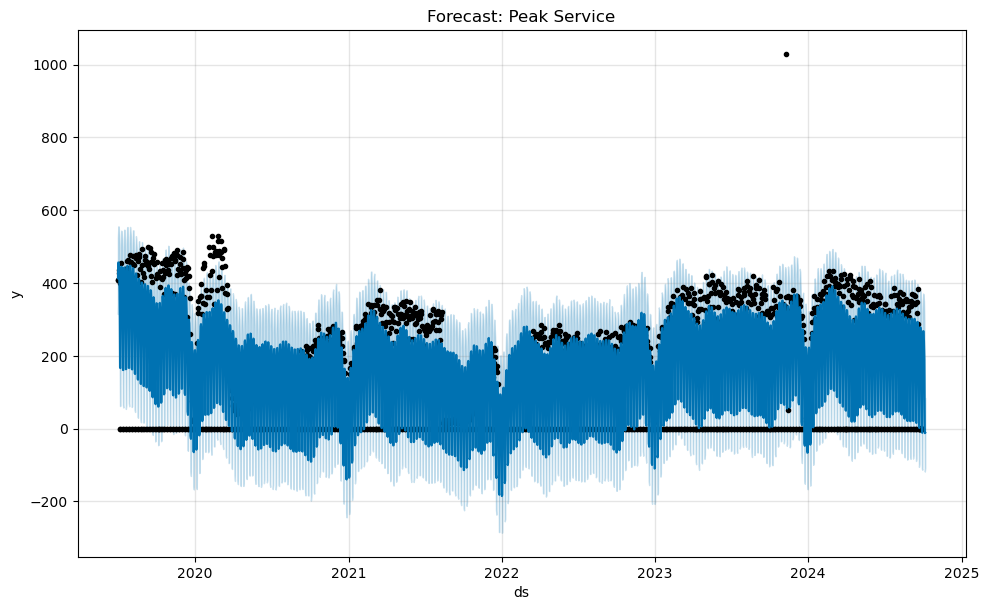

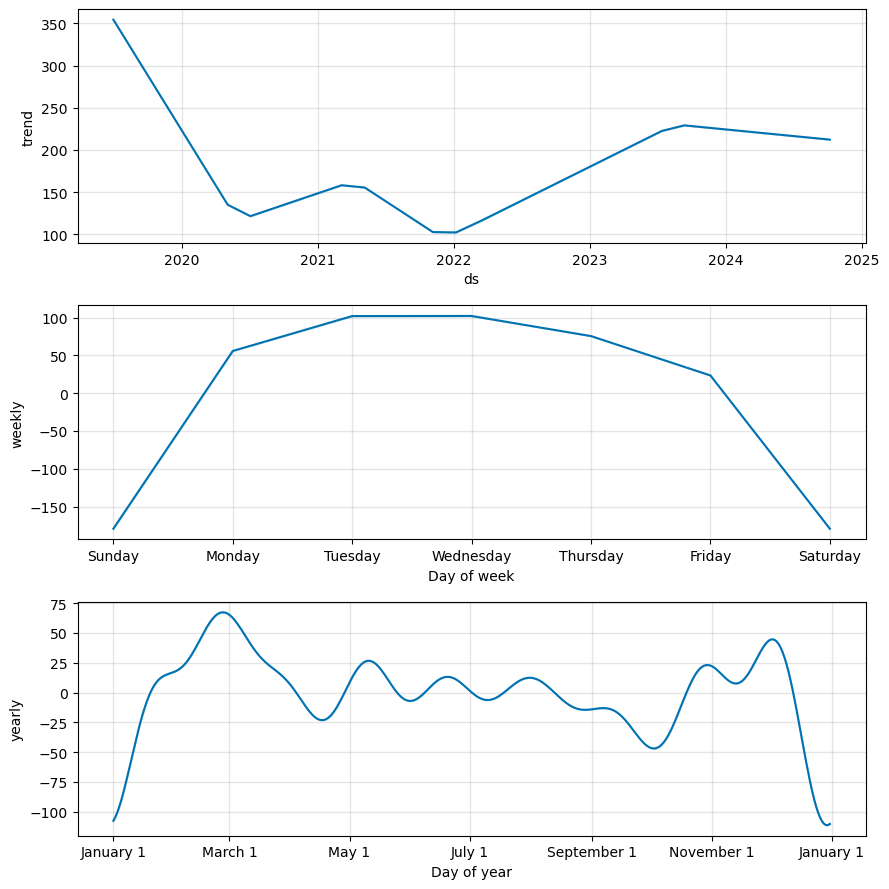

12:36:06 - cmdstanpy - INFO - Chain [1] start processing


Forecast saved to: forecast_peak_service.csv

Forecasting for: Rapid Route


12:36:06 - cmdstanpy - INFO - Chain [1] done processing


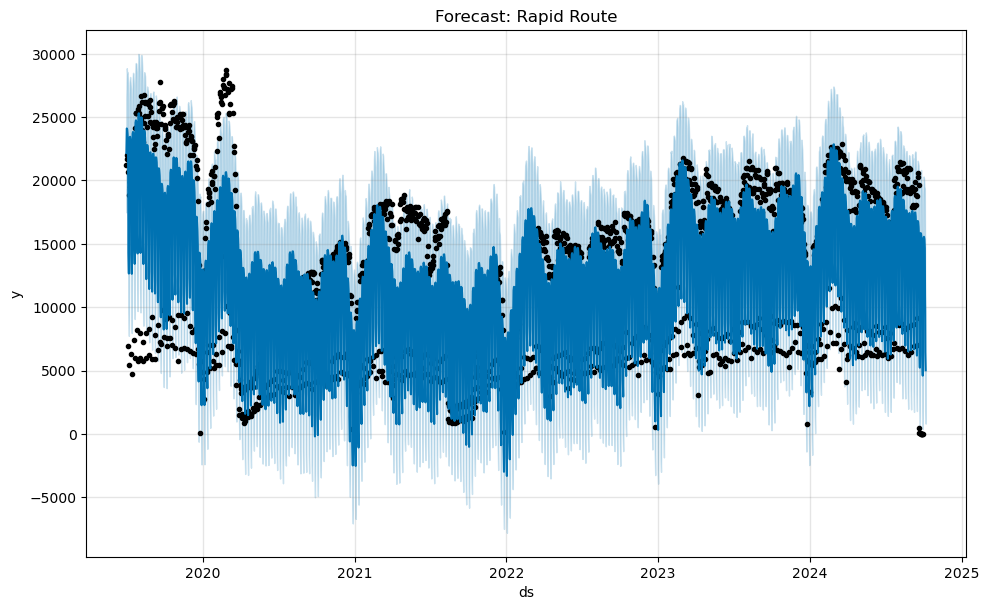

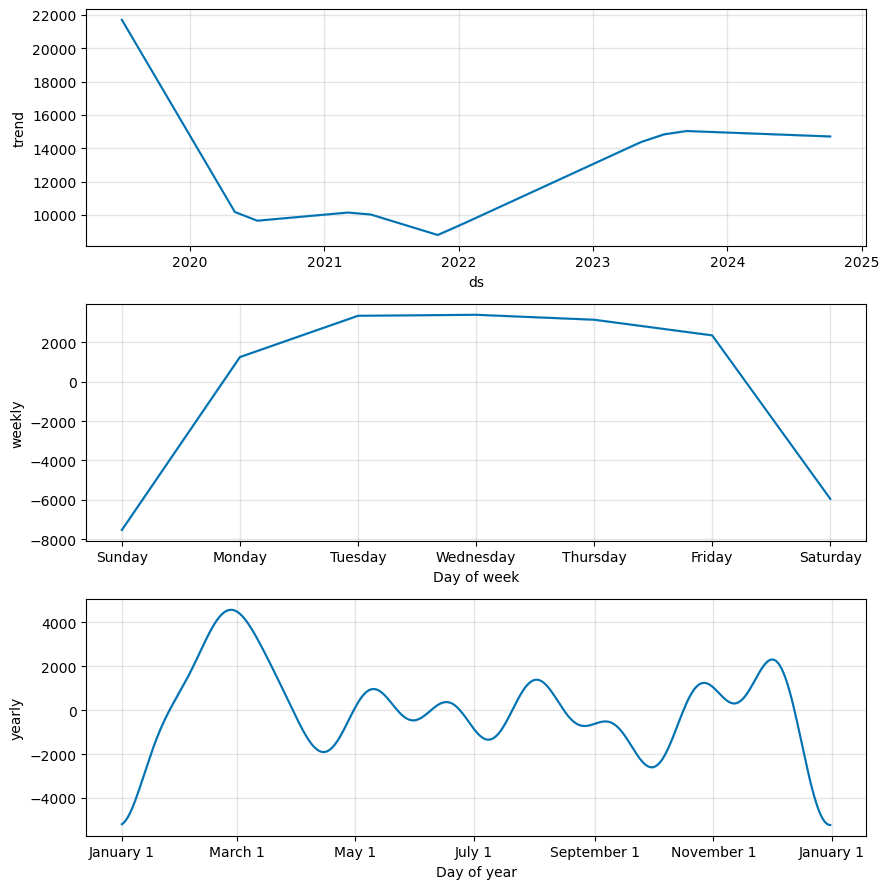

12:36:07 - cmdstanpy - INFO - Chain [1] start processing


Forecast saved to: forecast_rapid_route.csv

Forecasting for: School


12:36:07 - cmdstanpy - INFO - Chain [1] done processing


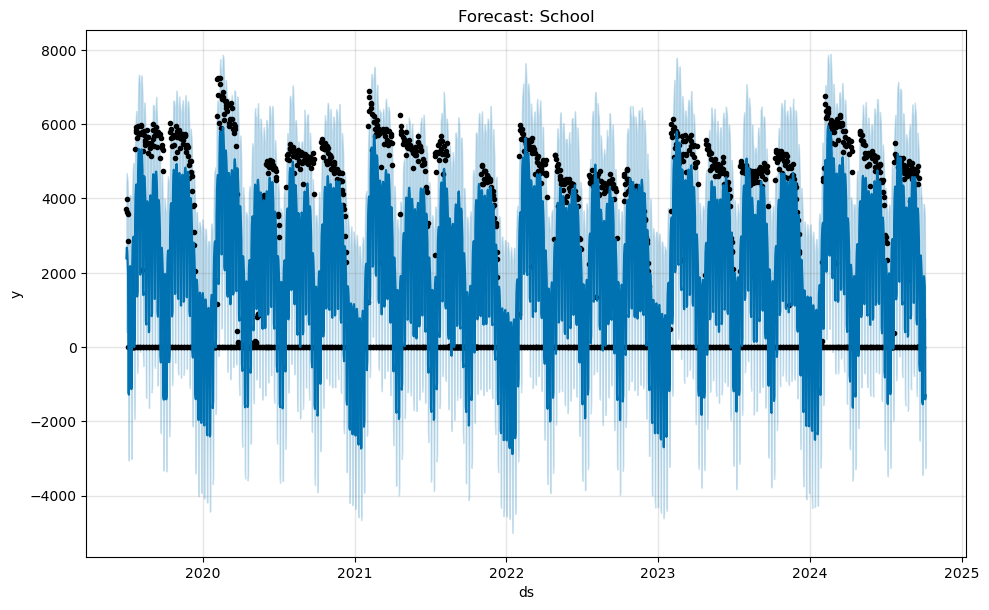

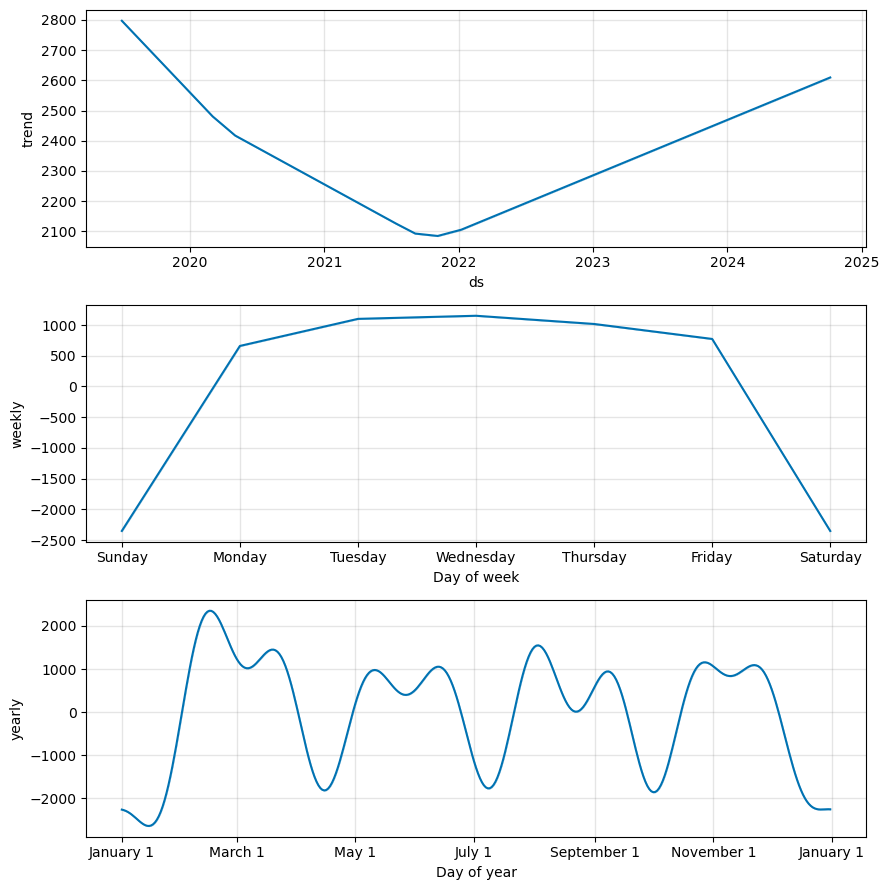

Forecast saved to: forecast_school.csv


In [9]:
def forecast_route(dataframe, column_name, days=7):
    print(f"\nForecasting for: {column_name}")
    
    prophet_df = dataframe[['Date', column_name]].rename(columns={'Date': 'ds', column_name: 'y'})
    
    model = Prophet()
    model.fit(prophet_df)
    
    # Create future dataframe and forecast
    future = model.make_future_dataframe(periods=days)
    forecast = model.predict(future)
    
    model.plot(forecast)
    plt.title(f"Forecast: {column_name}")
    plt.show()
    
    model.plot_components(forecast)
    plt.tight_layout()
    plt.show()
    
    save_path = f"forecast_{column_name.lower().replace(' ', '_')}.csv"
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv(save_path, index=False)
    print(f"Forecast saved to: {save_path}")

for route in columns:
    forecast_route(df, route, days=7)


12:36:09 - cmdstanpy - INFO - Chain [1] start processing
12:36:09 - cmdstanpy - INFO - Chain [1] done processing


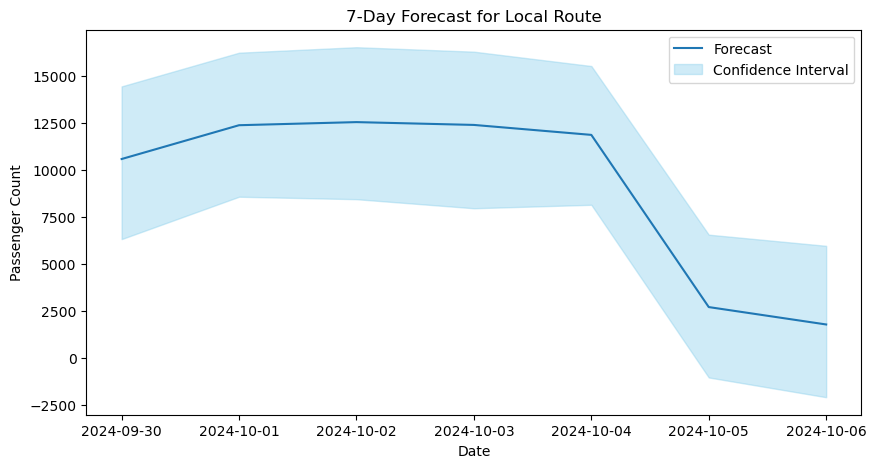

             ds          yhat   yhat_lower    yhat_upper
1918 2024-09-30  10579.922575  6325.733984  14438.414081
1919 2024-10-01  12375.776354  8576.985109  16228.357233
1920 2024-10-02  12540.870815  8445.928779  16519.152884
1921 2024-10-03  12391.129935  7964.242500  16282.600976
1922 2024-10-04  11862.335264  8148.518705  15520.153882
1923 2024-10-05   2715.001207 -1024.215786   6561.451300
1924 2024-10-06   1790.610792 -2074.007002   5968.668560


In [10]:
service_name = 'Local Route'

df_prophet = df[['Date', service_name]].rename(columns={'Date': 'ds', service_name: 'y'})
model = Prophet(daily_seasonality=True)
model.fit(df_prophet)

forecast_days = 7
future = model.make_future_dataframe(periods=forecast_days)
forecast = model.predict(future)

forecast_7days = forecast.tail(forecast_days)

plt.figure(figsize=(10,5))
plt.plot(forecast_7days['ds'], forecast_7days['yhat'], label='Forecast')
plt.fill_between(forecast_7days['ds'], forecast_7days['yhat_lower'], forecast_7days['yhat_upper'], 
                 color='skyblue', alpha=0.4, label='Confidence Interval')
plt.title(f"7-Day Forecast for {service_name}")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.legend()
plt.show()

print(forecast_7days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

12:36:10 - cmdstanpy - INFO - Chain [1] start processing
12:36:10 - cmdstanpy - INFO - Chain [1] done processing
12:36:10 - cmdstanpy - INFO - Chain [1] start processing
12:36:11 - cmdstanpy - INFO - Chain [1] done processing
12:36:11 - cmdstanpy - INFO - Chain [1] start processing
12:36:11 - cmdstanpy - INFO - Chain [1] done processing
12:36:12 - cmdstanpy - INFO - Chain [1] start processing
12:36:12 - cmdstanpy - INFO - Chain [1] done processing
12:36:12 - cmdstanpy - INFO - Chain [1] start processing
12:36:12 - cmdstanpy - INFO - Chain [1] done processing


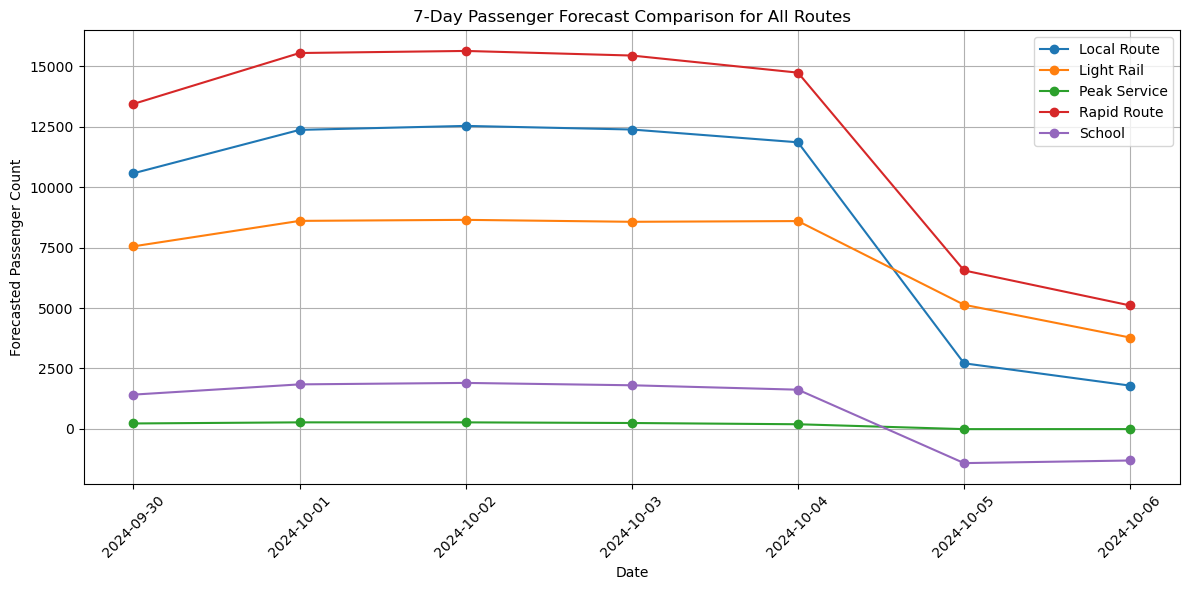

In [11]:
forecast_days = 7
services = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

forecasts = {}

for service in services:
    df_prophet = df[['Date', service]].rename(columns={'Date': 'ds', service: 'y'})
    model = Prophet(daily_seasonality=True)
    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=forecast_days)
    forecast = model.predict(future)
    # Keep only the forecast days (tail)
    forecasts[service] = forecast.tail(forecast_days)[['ds', 'yhat']].set_index('ds')

combined_forecast = pd.concat(forecasts.values(), axis=1)
combined_forecast.columns = services
combined_forecast.sort_index(inplace=True)

plt.figure(figsize=(12,6))
for service in services:
    plt.plot(combined_forecast.index, combined_forecast[service], marker='o', label=service)

plt.title('7-Day Passenger Forecast Comparison for All Routes')
plt.xlabel('Date')
plt.ylabel('Forecasted Passenger Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
